## implementing ANN dense layes for text binary classification

In [3]:
import tensorflow
from tensorflow import keras

In [4]:
 from tensorflow.keras.datasets import imdb
 (train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)
#(num_words=most accuring word or most frequent word
## hum ne limit lagae he 10000 isko change kr sakte he agar result acha na aye

In [5]:
train_data.shape

(25000,)

In [6]:
test_data.shape

(25000,)

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
len(train_data[0])

218

In [9]:
type(train_data[0])

list

In [10]:
train_labels.shape

(25000,)

In [11]:
word_index=imdb.get_word_index()

In [12]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [21]:

word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (value,key) in word_index.items()])
decoded_review=" ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [22]:
reverse_word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [15]:
# word_index=imdb.get_word_index()
# reverse_word_index=dict([(value,key) for (value,key) in word_index.items()])
# decoded_review1=" ".join([reverse_word_index.get(i - 3, "?") for i in train_data[1]])


In [17]:
# decoded_review1

'? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?'

In [41]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): ## manual one hot encoding
    results = np.zeros((len(sequences), dimension)) #we created a metrix of zeros
    #sequence --- a complete review
    print (sequences)
    for i, sequence in enumerate(sequences): #i enumerate
        results[i, sequence] = 1           
    return results
x_train = vectorize_sequences(train_data)   
x_test = vectorize_sequences(test_data)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [50]:
x_train[0].value_counts().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [19]:
len(train_labels)

25000

In [20]:
train_labels


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
 y_train = np.asarray(train_labels).astype("float32")
 y_test = np.asarray(test_labels).astype("float32")

In [28]:
 from tensorflow import keras 
from tensorflow.keras import layers
 model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")])

In [29]:
model.compile(optimizer="rmsprop",
      loss="binary_crossentropy",
      metrics=["accuracy"])

In [30]:
 x_val = x_train[:10000] #samples from 100000 to end
 partial_x_train = x_train[10000:]#before 100000
 y_val = y_train[:10000]
 partial_y_train = y_train[10000:]

In [31]:
 history = model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5283 - accuracy: 0.7632 - val_loss: 0.3931 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3232 - accuracy: 0.8949 - val_loss: 0.3101 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2357 - accuracy: 0.9230 - val_loss: 0.2893 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1896 - accuracy: 0.9370 - val_loss: 0.2864 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1592 - accuracy: 0.9466 - val_loss: 0.3023 - val_accuracy: 0.8790
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1358 - accuracy: 0.9580 - val_loss: 0.2841 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1127 - accuracy: 0.9659 - val_loss: 0.2990 - val_accuracy: 0.8836
Epoch 8/20
30

In [32]:
 >>> history_dict = history.history
 >>> history_dict.keys()
 [u"accuracy", u"loss", u"val_accuracy", u"val_loss"]

['accuracy', 'loss', 'val_accuracy', 'val_loss']

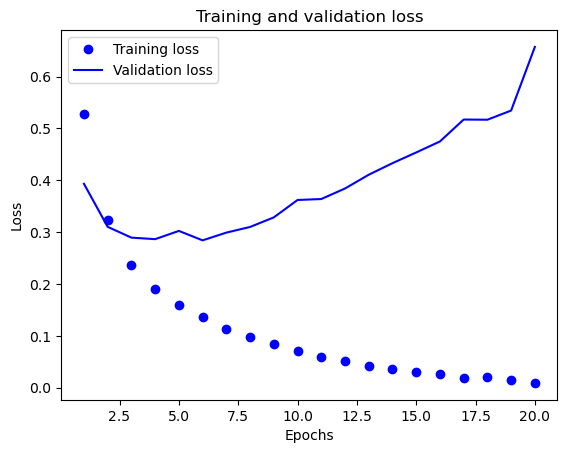

In [33]:
 import matplotlib.pyplot as plt
 history_dict = history.history
 loss_values = history_dict["loss"]
 val_loss_values = history_dict["val_loss"]
 epochs = range(1, len(loss_values) + 1)
 plt.plot(epochs, loss_values, "bo", label="Training loss")
 plt.plot(epochs, val_loss_values, "b", label="Validation loss")   
plt.title("Training and validation loss")
 plt.xlabel("Epochs")
 plt.ylabel("Loss")
 plt.legend()
 plt.show()

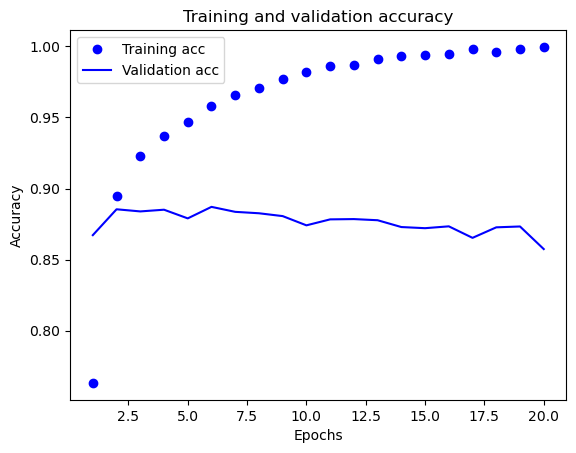

In [35]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [61]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
49/49 [==============================] - 3s 9ms/step - loss: 0.4822 - accuracy: 0.8161
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2930 - accuracy: 0.8993
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2292 - accuracy: 0.9198
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1948 - accuracy: 0.9304


In [60]:
 results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.2834 - accuracy: 0.8863


In [62]:
results

[0.28343772888183594, 0.8863199949264526]

In [63]:
 model.predict(x_test[249].reshape(1,10000)) # it is equal to y_pred

1/1 [==============================] - 0s 48ms/step


array([[0.9036276]], dtype=float32)

In [59]:
y_test[249]

1.0